In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def plot_permutation(P):
    n = len(P)
    x_values = [i for i in range(n)]
    y_values = P
    plt.scatter(x_values,y_values, label = str(P))

In [3]:
def unrank_permutation(n_list,d):
    n = len(n_list)
    nn_list = [h for h in n_list]
    if d == 0:
        return nn_list
    for k in range(n):
        if d < (k+1)*np.math.factorial(n-1):
            nn_list.remove(n_list[k])
            return [n_list[k]] + unrank_permutation(nn_list,d - k*np.math.factorial(n-1)) 

In [6]:
def count_1342(permutation):
    P = permutation
    n = len(P)
    C = 0
    for i in range(n-3):
        for j in range(i+1,n-2):
            if P[i] < P[j]:
                for k in range(j+1,n-1):
                    if P[j] < P[k]:
                        for l in range(k+1,n):
                            if P[i] < P[l] and P[l] < P[j]:
                                C = C + 1
    return C

In [6]:
def count_23514(permutation):
    P = permutation
    n = len(P)
    C = 0
    for i in range(n-4):
        for j in range(i+1,n-3):
            if P[i] < P[j]:
                for k in range(j+1,n-2):
                    if P[j] < P[k]:
                        for l in range(k+1,n-1):
                            if P[l] < P[i]:
                                for h in range(l+1,n):
                                    if P[j]<P[h] and P[h]<P[k]:
                                        C = C+1
    return C

In [9]:
count_23514([2,3,6,1,4,5])

2

In [4]:
def relative_order(p):
    '''takes a list of n distinct integers and returns the permutation from 0 to n-1 with the same relative order.'''
    n = len(p)
    SP = sorted(p)
    output = [0]*n
    for i in range(n):
        ind = SP.index(p[i])
        output[i] = ind
    return output

In [5]:
def crossover1(P1,P2):
    n = len(P1)
    offspring = [-1]*n
    r = random.random()
    if r < 0.5:
        offspring[0] = P1[0]
    else:
        offspring[0] = P2[0]
    for i in range(1,n):
        r = random.random()
        if r < 0.5:
            j = i
            while P1[j] in offspring:
                j = (j+1) % n
            offspring[i] = P1[j]
        else:
            j = i
            while P2[j] in offspring:
                j = (j+1) % n
            offspring[i] = P2[j]
    return offspring

In [60]:
crossover1([0,1,2,3,4,5],[5,4,3,2,1,0])

[5, 4, 2, 1, 0, 3]

In [6]:
def crossover2(P1,P2):
    n = len(P1)
    child1 = [-1]*n
    child2 = [-1]*n
    r = random.randint(1,n-1)
    for i in range(r):
        child1[i] = P1[i]
        child2[i] = P2[i]
    j = r
    while j < n:
        for k in range(n):
            if P2[k] not in child1:
                child1[j] = P2[k]
                j=j+1
    j = r
    while j < n:
        for k in range(n):
            if P1[k] not in child2:
                child2[j] = P1[k]
                j = j+1
    return [child1,child2]

In [7]:
def crossover3(P1,P2):
    n = len(P1)
    child1 = [-1]*n
    child2 = [-1]*n
    r = random.randint(1,n-1)
    for i in range(r):
        child1[i] = P1[i]
        child2[i] = P2[i]
    RO1 = relative_order(P1[r:])
    RO2 = relative_order(P2[r:])
    k = 0
    for i in range(n):
        if i not in child1:
            child1[r+RO2.index(k)] = i
            k = k+1
    k=0
    for i in range(n):
        if i not in child2:
            child2[r+RO1.index(k)] = i
            k = k+1
    return [child1,child2]

In [8]:
def mut1(Perm,r1,r2):
    n = len(Perm)
    output = [i for i in Perm]
    if r1 == r2:
        return(Perm)
    output[r1+1]=Perm[r2]
    for i in range(r1+2,r2+1):
        output[i] = Perm[i-1]
    return output

def mutation1(Perm):
    n = len(Perm)
    r1 = random.randint(0,n-1)
    r2 = random.randint(0,n-1)
    if r1<=r2:
        return mut1(Perm,r1,r2)
    else:
        REV = [Perm[n-1-j] for j in range(n)]
        output = mut1(REV,r2,r1)
        return [output[n-1-j] for j in range(n)]

In [95]:
def Evolutionary_Algorithm3_1342(n):
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(20000):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_1342(P)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<200001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,100)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover3(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        if mr < 0.9:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_1342(child1)
        fitness2 = count_1342(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:20000]
        if fe % 5000 == 0:
            print([fe],[POP[j][0] for j in range(10)],[POP[-1][0]])
            #plot_permutation(POP[0][1])
            #plt.show()
    return POP

In [42]:
#CROSSOVER3
EA = Evolutionary_Algorithm_1342(27)

[2500] [3068, 3022, 2931, 2916, 2904, 2871, 2868, 2864, 2855, 2829] [398]
[5000] [3483, 3452, 3416, 3383, 3346, 3304, 3302, 3290, 3279, 3274] [516]
[7500] [3634, 3547, 3529, 3511, 3511, 3501, 3483, 3478, 3475, 3469] [611]
[10000] [3676, 3675, 3668, 3660, 3658, 3637, 3636, 3636, 3636, 3634] [703]
[12500] [3809, 3794, 3777, 3772, 3768, 3739, 3730, 3729, 3728, 3727] [803]
[15000] [3913, 3912, 3903, 3873, 3873, 3857, 3848, 3836, 3827, 3827] [916]
[17500] [3913, 3912, 3912, 3903, 3901, 3895, 3880, 3873, 3873, 3873] [1083]
[20000] [3951, 3948, 3945, 3945, 3940, 3936, 3924, 3918, 3918, 3917] [1433]
[22500] [3952, 3951, 3950, 3950, 3950, 3948, 3947, 3946, 3945, 3945] [2147]
[25000] [3968, 3960, 3960, 3958, 3958, 3956, 3954, 3954, 3954, 3952] [2710]
[27500] [3988, 3988, 3986, 3983, 3978, 3976, 3976, 3974, 3973, 3968] [3036]
[30000] [4012, 3997, 3996, 3993, 3991, 3988, 3988, 3987, 3986, 3984] [3220]
[32500] [4012, 4011, 4011, 4011, 4009, 4006, 3997, 3996, 3996, 3995] [3350]
[35000] [4012, 4011, 

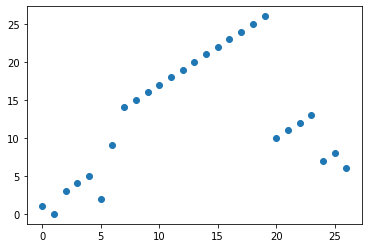

In [44]:
plot_permutation(EA[0][1])
plt.show()

In [96]:
def Evolutionary_Algorithm2_1342(n):
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(20000):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_1342(P)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<200001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,100)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover2(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        if mr < 0.9:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_1342(child1)
        fitness2 = count_1342(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:20000]
        if fe % 5000 == 0:
            print([fe],[POP[j][0] for j in range(10)],[POP[-1][0]])
            #plot_permutation(POP[0][1])
            #plt.show()
    return POP

In [46]:
#CROSSOVER2
EA = Evolutionary_Algorithm_1342(27)

[2500] [2788, 2705, 2641, 2631, 2606, 2554, 2544, 2531, 2517, 2492] [395]
[5000] [3273, 3121, 3006, 2973, 2969, 2952, 2948, 2940, 2929, 2911] [512]
[7500] [3300, 3275, 3273, 3273, 3266, 3197, 3178, 3153, 3130, 3125] [609]
[10000] [3484, 3464, 3461, 3445, 3431, 3424, 3423, 3423, 3420, 3391] [700]
[12500] [3520, 3510, 3509, 3507, 3503, 3500, 3495, 3491, 3491, 3490] [796]
[15000] [3659, 3634, 3631, 3616, 3603, 3602, 3600, 3600, 3600, 3597] [915]
[17500] [3734, 3734, 3711, 3703, 3702, 3692, 3688, 3662, 3662, 3660] [1068]
[20000] [3813, 3772, 3758, 3755, 3746, 3746, 3743, 3741, 3738, 3734] [1344]
[22500] [3816, 3813, 3813, 3800, 3799, 3796, 3791, 3785, 3784, 3782] [1786]
[25000] [3886, 3878, 3860, 3847, 3838, 3832, 3819, 3816, 3813, 3813] [2187]
[27500] [3929, 3929, 3906, 3905, 3904, 3890, 3886, 3886, 3886, 3885] [2523]
[30000] [3934, 3929, 3929, 3929, 3929, 3929, 3927, 3919, 3918, 3918] [2795]
[32500] [3936, 3936, 3936, 3934, 3933, 3931, 3931, 3931, 3930, 3929] [3029]
[35000] [3949, 3939, 

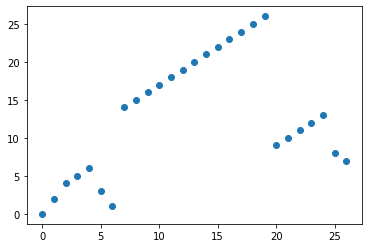

In [47]:
plot_permutation(EA[0][1])
plt.show()

In [97]:
def Evolutionary_Algorithm1_1342(n):
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(20000):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_1342(P)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<200001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,100)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        P3 = randomset[-3]
        P4 = randomset[-4]
        child1 = crossover1(P1[1],P4[1])
        child2 = crossover1(P2[1],P3[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        if mr < 0.9:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_1342(child1)
        fitness2 = count_1342(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:20000]
        if fe % 5000 == 0:
            print([fe],[POP[j][0] for j in range(10)],[POP[-1][0]])
            #plot_permutation(POP[0][1])
            #plt.show()
    return POP

In [64]:
#CROSSOVER1
EA = Evolutionary_Algorithm_1342(27)

[2500] [2559, 2554, 2423, 2357, 2357, 2347, 2317, 2277, 2261, 2258] [395]
[5000] [2784, 2559, 2554, 2435, 2428, 2423, 2415, 2401, 2377, 2372] [507]
[7500] [2922, 2784, 2597, 2559, 2554, 2543, 2520, 2498, 2498, 2487] [602]
[10000] [2922, 2865, 2840, 2823, 2796, 2784, 2725, 2681, 2640, 2597] [695]
[12500] [2922, 2912, 2888, 2865, 2840, 2823, 2822, 2796, 2784, 2777] [786]
[15000] [2996, 2979, 2922, 2912, 2888, 2865, 2840, 2823, 2822, 2796] [890]
[17500] [2996, 2979, 2975, 2963, 2922, 2914, 2913, 2912, 2905, 2895] [1005]
[20000] [2996, 2994, 2979, 2975, 2975, 2963, 2922, 2914, 2913, 2912] [1143]
[22500] [3093, 2996, 2994, 2979, 2975, 2975, 2963, 2948, 2922, 2919] [1289]
[25000] [3093, 2996, 2994, 2979, 2975, 2975, 2963, 2962, 2948, 2922] [1419]
[27500] [3093, 3072, 2996, 2994, 2979, 2976, 2975, 2975, 2963, 2962] [1533]
[30000] [3140, 3100, 3093, 3072, 2997, 2996, 2994, 2979, 2976, 2975] [1630]
[32500] [3140, 3107, 3100, 3093, 3087, 3072, 3049, 2997, 2996, 2994] [1711]
[35000] [3140, 3136, 

In [55]:
fe

NameError: name 'fe' is not defined

In [105]:
print('crossover 3')
EA3 = Evolutionary_Algorithm3_1342(64)
print('crossover 2')
EA2 = Evolutionary_Algorithm3_1342(64)
print('crossover 1')
EA1 = Evolutionary_Algorithm3_1342(64)

crossover 3
[5000] [93160, 91822, 91736, 91291, 91131, 91046, 91027, 90437, 90293, 90205] [21978]
[10000] [106298, 106067, 106042, 106025, 105721, 105486, 105381, 105310, 105234, 105012] [26017]
[15000] [115184, 115184, 115172, 115053, 114561, 114560, 114536, 114305, 114104, 114077] [30577]
[20000] [120086, 119310, 118357, 118279, 118257, 118128, 118127, 118100, 118034, 118016] [41785]
[25000] [121471, 121455, 121454, 121417, 121409, 121313, 121246, 121031, 120960, 120950] [81621]
[30000] [125686, 125034, 125030, 124973, 124952, 124937, 124815, 124737, 124716, 124713] [99715]
[35000] [126847, 126648, 126415, 126350, 126340, 126340, 126322, 126322, 126286, 126264] [108853]
[40000] [128017, 127857, 127760, 127743, 127590, 127562, 127553, 127538, 127532, 127527] [113605]
[45000] [129117, 129111, 129111, 128849, 128790, 128782, 128776, 128770, 128768, 128715] [116901]
[50000] [129725, 129401, 129364, 129341, 129340, 129337, 129332, 129306, 129298, 129282] [119626]
[55000] [130528, 130522, 

[25000] [123985, 123837, 123826, 123721, 123508, 123239, 123175, 123170, 123095, 123065] [79021]
[30000] [125438, 125241, 125069, 125069, 125055, 125052, 125051, 124940, 124611, 124593] [99397]
[35000] [126281, 126267, 126223, 126141, 126084, 126015, 125935, 125914, 125910, 125828] [109078]
[40000] [128159, 127849, 127708, 127634, 127611, 127589, 127578, 127546, 127542, 127514] [114606]
[45000] [128828, 128806, 128765, 128672, 128650, 128639, 128620, 128612, 128585, 128585] [118163]
[50000] [129658, 129532, 129528, 129518, 129481, 129464, 129456, 129451, 129437, 129380] [120510]
[55000] [130498, 130220, 130162, 130137, 130088, 130070, 130036, 129964, 129960, 129948] [122287]
[60000] [131073, 131072, 131068, 130776, 130759, 130704, 130690, 130592, 130584, 130553] [123684]
[65000] [131425, 131377, 131312, 131269, 131229, 131152, 131142, 131142, 131141, 131139] [124833]
[70000] [132329, 132039, 132039, 131853, 131645, 131633, 131626, 131599, 131596, 131588] [125816]
[75000] [132329, 13231

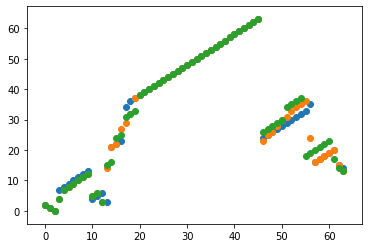

In [79]:
plot_permutation(EA3[0][1])
plot_permutation(EA2[0][1])32
plot_permutation(EA1[0][1])

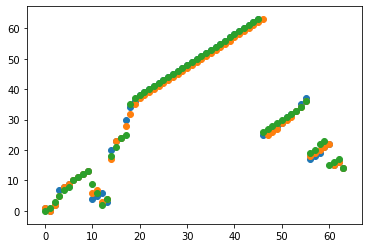

In [71]:
plot_permutation(EA3[0][1])
plot_permutation(EA2[0][1])
plot_permutation(EA1[0][1])

Running crossovers 1,2,3 crossover 1 performed the best!!
With n = 64, we ran 200000 fitness evaluations with a population of 20000, mutation rate of 0.9 and parent selection as best 2 out of 75

Crossover 3 found a permutation with 133646 occurrences

Crossover 2 found a permutation with 133643 occurrences and

crossover 1 found a permuation with 133720 occurrences.

I tried again with selecting the best 2 out of 1000 and it did significantly worse for crossover 2 and 1 and only slightly better for crossover 3. What was really disturbing was that the entire population had the same exact fitness implying that there was little to no variability when the computations ended after 200000 fitness evaluations.:

Also, each one was very fast in growing, crossover 3 reaching its maximum after 50000 fe's and CO1 annd CO2 reached their peak within the first 25000 fe's

Crossover 3 found a permutation with 133695 occurrences

Crossover 2 found a permutation with 133366 occurrences and

crossover 1 found a permuation with 133348 occurrences.

Let's try again with choosing 2 out of 25.
That was not good but it was clear that for each algorithm, it likely would have kept improving.

Crossover 3 found a permutation with 131861 occurrences

Crossover 2 found a permutation with 131575 occurrences and

crossover 1 found a permuation with 133377 occurrences.

Let's do 2 out of 200. That may be just what we need!
Crossover 3 found a permutation with 133640 occurrences

Crossover 2 found a permutation with 133544 occurrences and

crossover 1 found a permuation with 133609 occurrences.

at 2 out of 50 it was:
Crossover 3 found a permutation with 133434 occurrences

Crossover 2 found a permutation with 133624 occurrences and

crossover 1 found a permuation with 133622 occurrences.

At 2 out of 100 it was:
Crossover 3 found a permutation with 133239 occurrences

Crossover 2 found a permutation with 133723, occurrences and

crossover 1 found a permuation with 133138 occurrences.
Although this is the best yet! (133723), it seems like each algorithm reached its value early on and got stuck there. Let's do it again and see if we get similar results:

At 2 out of 100 again it was:
Crossover 3 found a permutation with 133778 occurrences

Crossover 2 found a permutation with 133663, occurrences and

crossover 1 found a permuation with 133499 occurrences.
Although this is the best yet! (133778), it seems like each algorithm reached its value early on and got stuck there. But we had record breaking numbers each time so it must be good. LEt's try one more time and see if anything is 

At 2 out of 100 again it was:
Crossover 3 found a permutation with 133729 occurrences

Crossover 2 found a permutation with 133792, occurrences and

crossover 1 found a permuation with 133400 occurrences.
Although this is the best yet! (133778), it seems like each algorithm reached its value early on and got stuck there. But we had record breaking numbers each time so it must be good. LEt's try one more time and see if anything is 

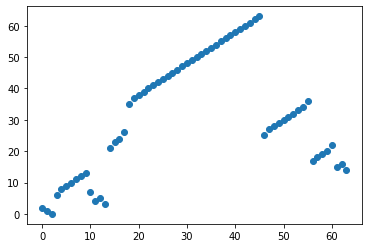

In [102]:
#the plot of the 64 permutation with 133778 occurrences of 1342
plot_permutation(EA3[0][1])


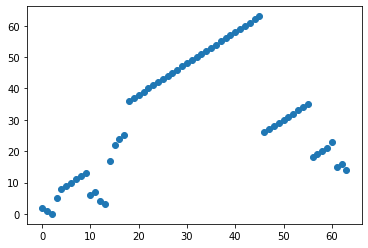

In [104]:
#the plot of the 64 permutation with 133792 occurrences of 1342
plot_permutation(EA2[0][1])

In [17]:
def Evolutionary_Algorithm2_23514(n):
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(20000):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_23514(P)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<200001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,100)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover2(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        while mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
            mr = random.random()
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_23514(child1)
        fitness2 = count_23514(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:20000]
        if fe % 5000 == 0:
            print([fe],[POP[j][0] for j in range(10)],[POP[-1][0]])
            #plot_permutation(POP[0][1])
            #plt.show()
    return POP

In [18]:
Evolutionary_Algorithm2_23514(50)

[5000] [78248, 76707, 74086, 74005, 73967, 73674, 72795, 72023, 71987, 71945] [13442]
[10000] [94850, 93621, 93401, 92231, 90349, 89623, 88918, 87808, 87781, 87718] [16910]
[15000] [112017, 110996, 110001, 109922, 109085, 108832, 108611, 108221, 107428, 106944] [20923]
[20000] [129471, 128566, 128479, 126744, 124253, 124253, 124253, 123975, 123833, 123369] [29345]
[25000] [139549, 135952, 134896, 134829, 134678, 134659, 134033, 133787, 133304, 133190] [47149]
[30000] [146149, 146142, 142815, 142619, 141961, 141882, 141542, 141380, 140776, 140720] [63067]
[35000] [152077, 150965, 150504, 149929, 149518, 148965, 148191, 148039, 147552, 146149] [77939]
[40000] [154800, 154527, 154527, 153850, 153667, 153448, 153168, 153168, 153166, 152783] [91310]
[45000] [163443, 163443, 159340, 157756, 157663, 157646, 157424, 157116, 157009, 157009] [101799]
[50000] [165456, 164770, 163721, 163443, 163443, 163443, 163443, 163324, 162953, 162919] [110657]
[55000] [170447, 168183, 167498, 167476, 167476, 

[[190113,
  [10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   42,
   43,
   44,
   45,
   49,
   48,
   41,
   40,
   47,
   46,
   1,
   9,
   2,
   4,
   5,
   8,
   0,
   7,
   3,
   6,
   32,
   33,
   34,
   35,
   39,
   38,
   30,
   31,
   37,
   36]],
 [190113,
  [10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   42,
   43,
   44,
   45,
   49,
   48,
   41,
   40,
   47,
   46,
   1,
   9,
   2,
   4,
   5,
   8,
   0,
   7,
   3,
   6,
   32,
   33,
   34,
   35,
   39,
   38,
   30,
   31,
   37,
   36]],
 [190113,
  [10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   42,
   43,
   44,
   45,
   49,
   48,
   41,
   40,
   47,
   46,
   1,
   9,
   2,
   4,
   5,
   8,
   0,
   7,
   3,
   6,
   32,
   33,
  

In [20]:
pp = [10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   42,
   43,
   44,
   45,
   49,
   48,
   41,
   40,
   47,
   46,
   1,
   9,
   2,
   4,
   5,
   8,
   0,
   7,
   3,
   6,
   32,
   33,
   34,
   35,
   39,
   38,
   30,
   31,
   37,
   36]

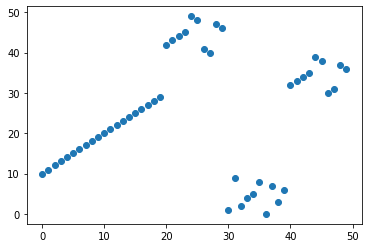

In [21]:
plot_permutation(pp)

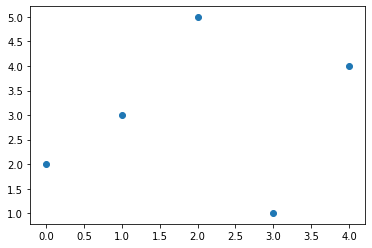

In [22]:
plot_permutation([2,3,5,1,4])

In [12]:
def count_6482x17593(permutation):
    P = permutation
    n = len(P)
    C = 0
    for a in range(n-9):
        for b in range(a+1,n-8):
            if P[a] > P[b]:
                for c in range(b+1,n-7):
                    if P[c] > P[a]:
                        for d in range(c+1,n-6):
                            if P[d] < P[b]:
                                for e in range(d+1,n-5):
                                    if P[e]>P[c]:
                                        for f in range(e+1,n-4):
                                            if P[f]<P[d]:
                                                for g in range(f+1,n-3):
                                                    if P[g] > P[a] and P[g] <P[c]:
                                                        for h in range(g+1,n-2):
                                                            if P[h] < P[a] and P[h] > P[b]:
                                                                for i in range(h+1,n-1):
                                                                    if P[i] > P[c] and P[i]<P[e]:
                                                                        for j in range(i+1,n):
                                                                            if P[j]< P[b] and P[j] >P[d]:
                                                                                C = C+1
    return C

In [13]:
def Evolutionary_Algorithm2_6482x17593(n):
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(20000):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_6482x17593(P)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<200001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,100)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover2(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        while mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
            mr = random.random()
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_6482x17593(child1)
        fitness2 = count_6482x17593(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:20000]
        if fe % 10000 == 0:
            print([fe],[POP[j][0] for j in range(10)],[POP[-1][0]])
            plot_permutation(POP[0][1])
            plt.show()
    return POP

[10000] [525507, 522463, 508853, 475635, 475635, 459806, 450941, 442654, 427530, 419440] [1378]


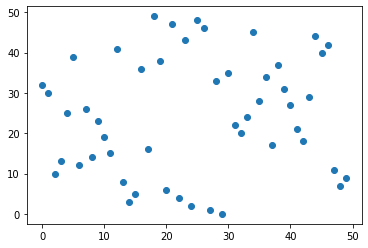

[20000] [1529434, 1522571, 1522571, 1486596, 1452891, 1419916, 1348628, 1341401, 1316276, 1257890] [7558]


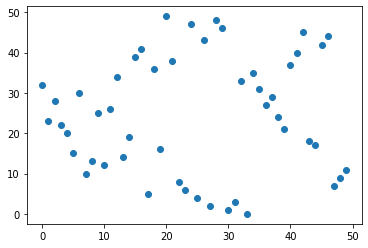

[30000] [2474908, 2236260, 2159584, 2146992, 2132711, 2113688, 2099547, 2080528, 2076771, 2053829] [89514]


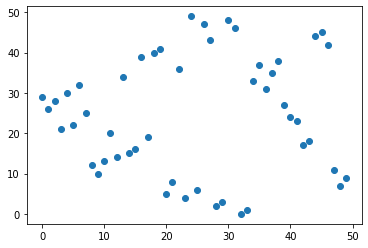

[40000] [3786302, 3324487, 3305263, 3252125, 3215118, 3188095, 3161884, 3142302, 3116273, 3090196] [383314]


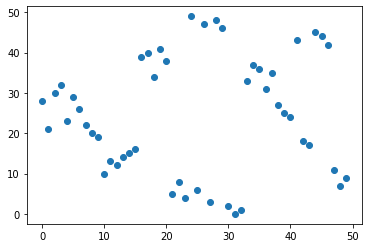

[50000] [4372769, 4321260, 4266328, 4260114, 4260114, 4246196, 4239283, 4218800, 4209289, 4143931] [834650]


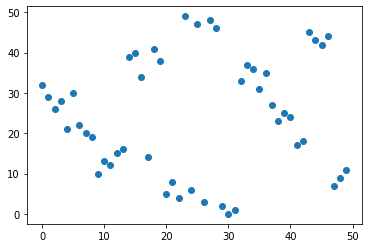

[60000] [4848648, 4826958, 4812576, 4787792, 4765600, 4765600, 4765600, 4765600, 4765600, 4749524] [1386430]


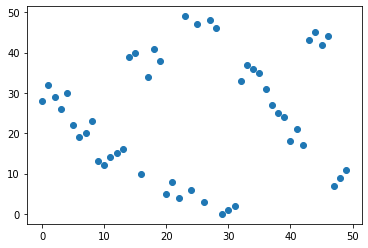

[70000] [5709006, 5709006, 5709006, 5709006, 5525385, 5513377, 5436538, 5239564, 5181194, 5136924] [1976054]


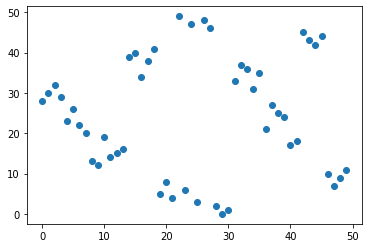

[80000] [5806429, 5739144, 5739144, 5726976, 5709006, 5709006, 5709006, 5709006, 5709006, 5709006] [2534870]


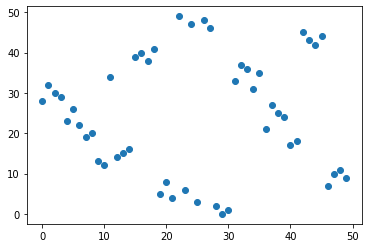

[90000] [6715200, 6470400, 6286052, 6262016, 6233720, 6018304, 6018304, 6018304, 6007607, 6002128] [3026144]


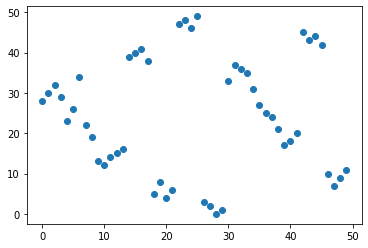

[100000] [6827520, 6825312, 6825216, 6795840, 6795840, 6777600, 6777600, 6777600, 6777600, 6777600] [3484930]


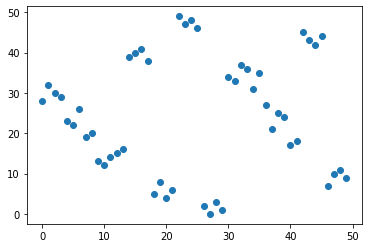

[110000] [7238400, 7230600, 7226880, 7226880, 7226880, 7208192, 7208192, 7188736, 7188736, 7188736] [3924144]


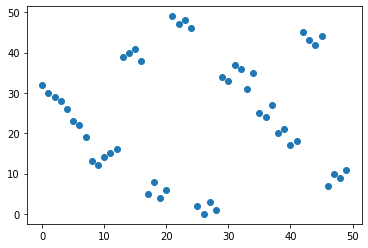

[120000] [8084480, 7844000, 7783360, 7772960, 7689984, 7680256, 7675392, 7636480, 7631616, 7631616] [4367116]


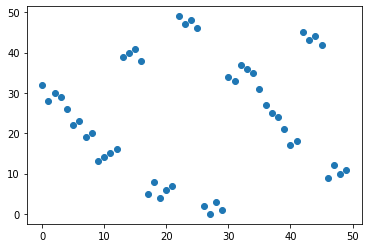

[130000] [8480000, 8128960, 8128960, 8128960, 8084480, 8084480, 8080320, 8080320, 8080320, 8080320] [4824551]


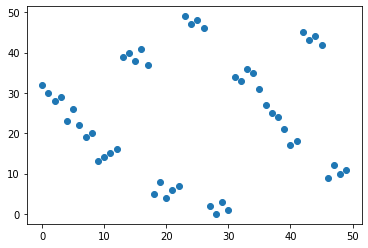

[140000] [8840000, 8704000, 8556800, 8556800, 8556800, 8556800, 8556800, 8556800, 8556800, 8556800] [5330880]


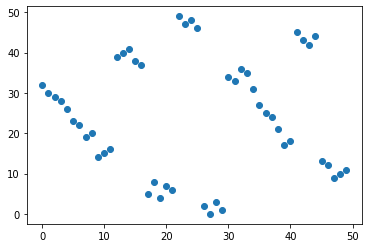

[150000] [8840000, 8840000, 8840000, 8840000, 8840000, 8742400, 8742400, 8729600, 8704000, 8691200] [5855769]


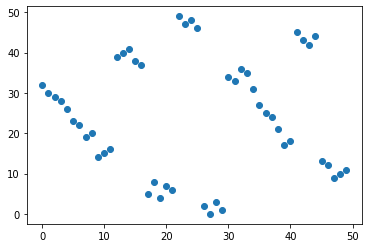

[160000] [8840000, 8840000, 8840000, 8840000, 8840000, 8840000, 8840000, 8840000, 8840000, 8840000] [6358624]


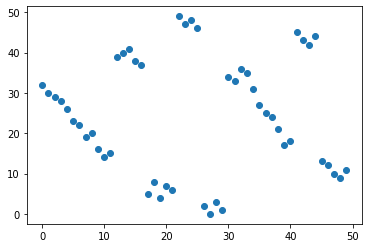

[170000] [8976000, 8976000, 8968000, 8968000, 8968000, 8936000, 8936000, 8936000, 8936000, 8928000] [6727680]


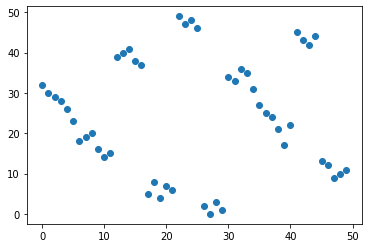

[180000] [9232000, 9232000, 9048000, 9048000, 9048000, 8976000, 8976000, 8976000, 8976000, 8976000] [7069440]


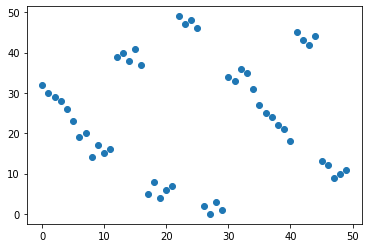

[190000] [9232000, 9232000, 9232000, 9232000, 9232000, 9232000, 9232000, 9232000, 9232000, 9232000] [7288000]


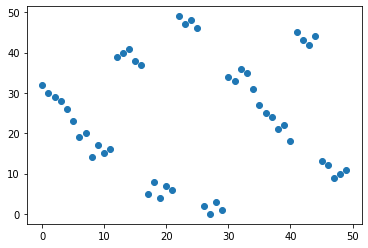

[200000] [9235200, 9235200, 9232000, 9232000, 9232000, 9232000, 9232000, 9232000, 9232000, 9232000] [7526400]


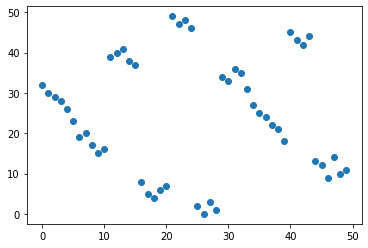

In [14]:
EAX = Evolutionary_Algorithm2_6482x17593(50)

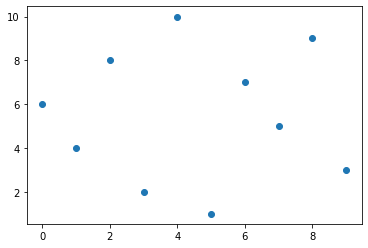

In [9]:
plot_permutation([6,4,8,2,10,1,7,5,9,3])
plt.show()

In [1]:
def count_2413(permutation):
    P = permutation
    n = len(P)
    C = 0
    for i in range(n-3):
        for j in range(i+1,n-2):
            if P[i] < P[j]:
                for k in range(j+1,n-1):
                    if P[k] < P[i]:
                        for l in range(k+1,n):
                            if P[l] < P[j] and P[l]>  P[i]:
                                C = C+1
    return C

In [2]:
def Evolutionary_Algorithm3_2413(n):
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(20000):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_2413(P)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<200001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,100)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover3(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        if mr < 0.9:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_2413(child1)
        fitness2 = count_2413(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:20000]
        if fe % 5000 == 0:
            print([fe],[POP[j][0] for j in range(10)],[POP[-1][0]])
            plot_permutation(POP[0][1])
            plt.show()
    return POP